In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Gamer\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk

In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Gamer\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [12]:
pip install text2emotion


You should consider upgrading via the 'c:\Users\Gamer\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\Gamer\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [16]:
pip install raceplotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Gamer\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import text2emotion as te
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import clear_output
import matplotlib.pyplot as plt
from raceplotly.plots import barplot

In [18]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Read the CSV file into a DataFrame
data = pd.read_csv('reddit_wsb.csv')

# Fill NaN values in the 'body' column with empty strings
data['body'].fillna('', inplace=True)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [19]:
# What is the average length of the title
data['len']=data['title'].apply(lambda x : len(x.split(' ')))
px.histogram(data['len'],template='plotly_dark')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'variable=len<br>value=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'len',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'len',
              'offsetgroup': 'len',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([11, 12,  3, ...,  7,  7, 12], dtype=int64),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'value'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [20]:
# What is the average length of the title
data['len']=data['body'].apply(lambda x : len(x.split(' ')))
px.histogram(data['len'],template='plotly_dark')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'variable=len<br>value=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'len',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'len',
              'offsetgroup': 'len',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([  1,   1, 222, ...,   1, 124,  14], dtype=int64),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'value'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [21]:
# Calculate descriptive statistics
title_length_stats = data['title'].apply(len).describe()
body_length_stats = data['body'].apply(len).describe()

# Display the results
print("Title Length Statistics:")
print(title_length_stats)

print("\nBody Length Statistics:")
print(body_length_stats)

Title Length Statistics:
count    53187.000000
mean        58.488052
std         45.942423
min          1.000000
25%         28.000000
50%         46.000000
75%         75.000000
max        300.000000
Name: title, dtype: float64

Body Length Statistics:
count    53187.000000
mean       637.236656
std       1859.935398
min          0.000000
25%          0.000000
50%          0.000000
75%        445.000000
max      39722.000000
Name: body, dtype: float64


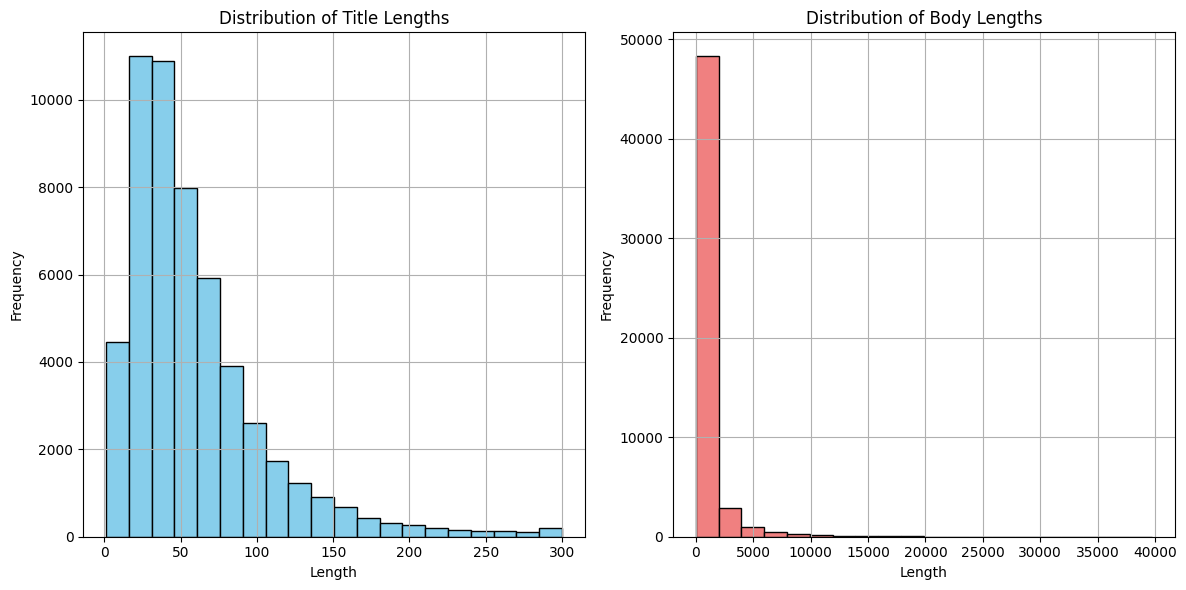

In [22]:
import matplotlib.pyplot as plt

# Create histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['title'].apply(len).hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Title Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['body'].apply(len).hist(bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Body Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [23]:
# Calculate the correlation coefficient
correlation_coefficient = df['title'].apply(len).corr(df['body'].apply(len))

# Display the correlation coefficient
print(f"Correlation Coefficient between Title and Body Lengths: {correlation_coefficient}")


Correlation Coefficient between Title and Body Lengths: 0.02544160233527706


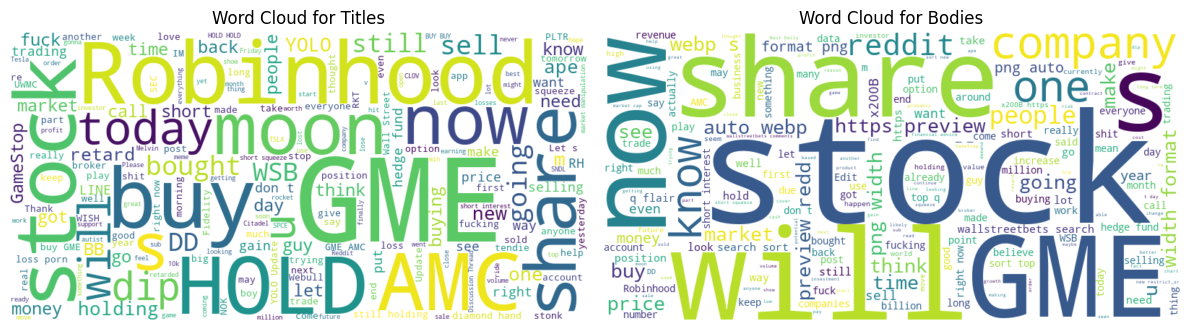

In [24]:
from wordcloud import WordCloud

# Generate word clouds
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title']))
body_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['body']))

# Display the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Titles')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(body_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Bodies')
plt.axis('off')

plt.tight_layout()
plt.show()
